1.Loading the Dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [6]:
df = pd.read_csv(r'E:\Datasets\Churn_Modelling.csv' )
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


2.Performing Visulizations

Univariate Analysis on Tenure

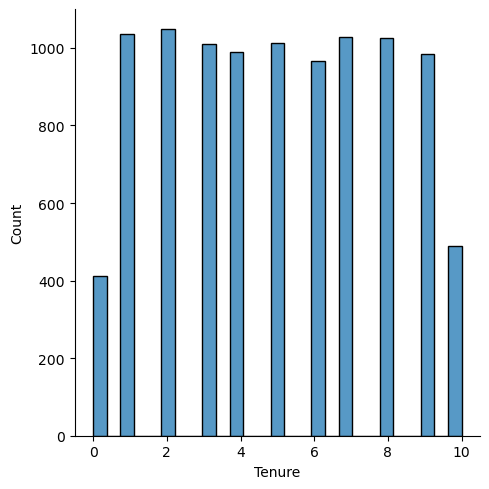

In [8]:
sns.displot(df.Tenure)

Bivariate Analysis on Estimated salary and Age

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


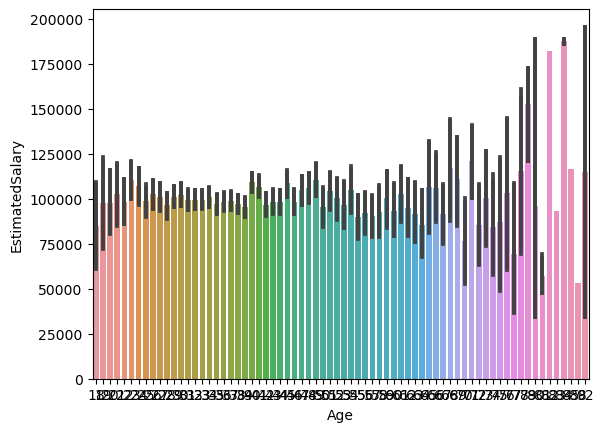

In [10]:
sns.barplot(df["Age"], df["EstimatedSalary"])
plt.show()

Multivariate Analysis

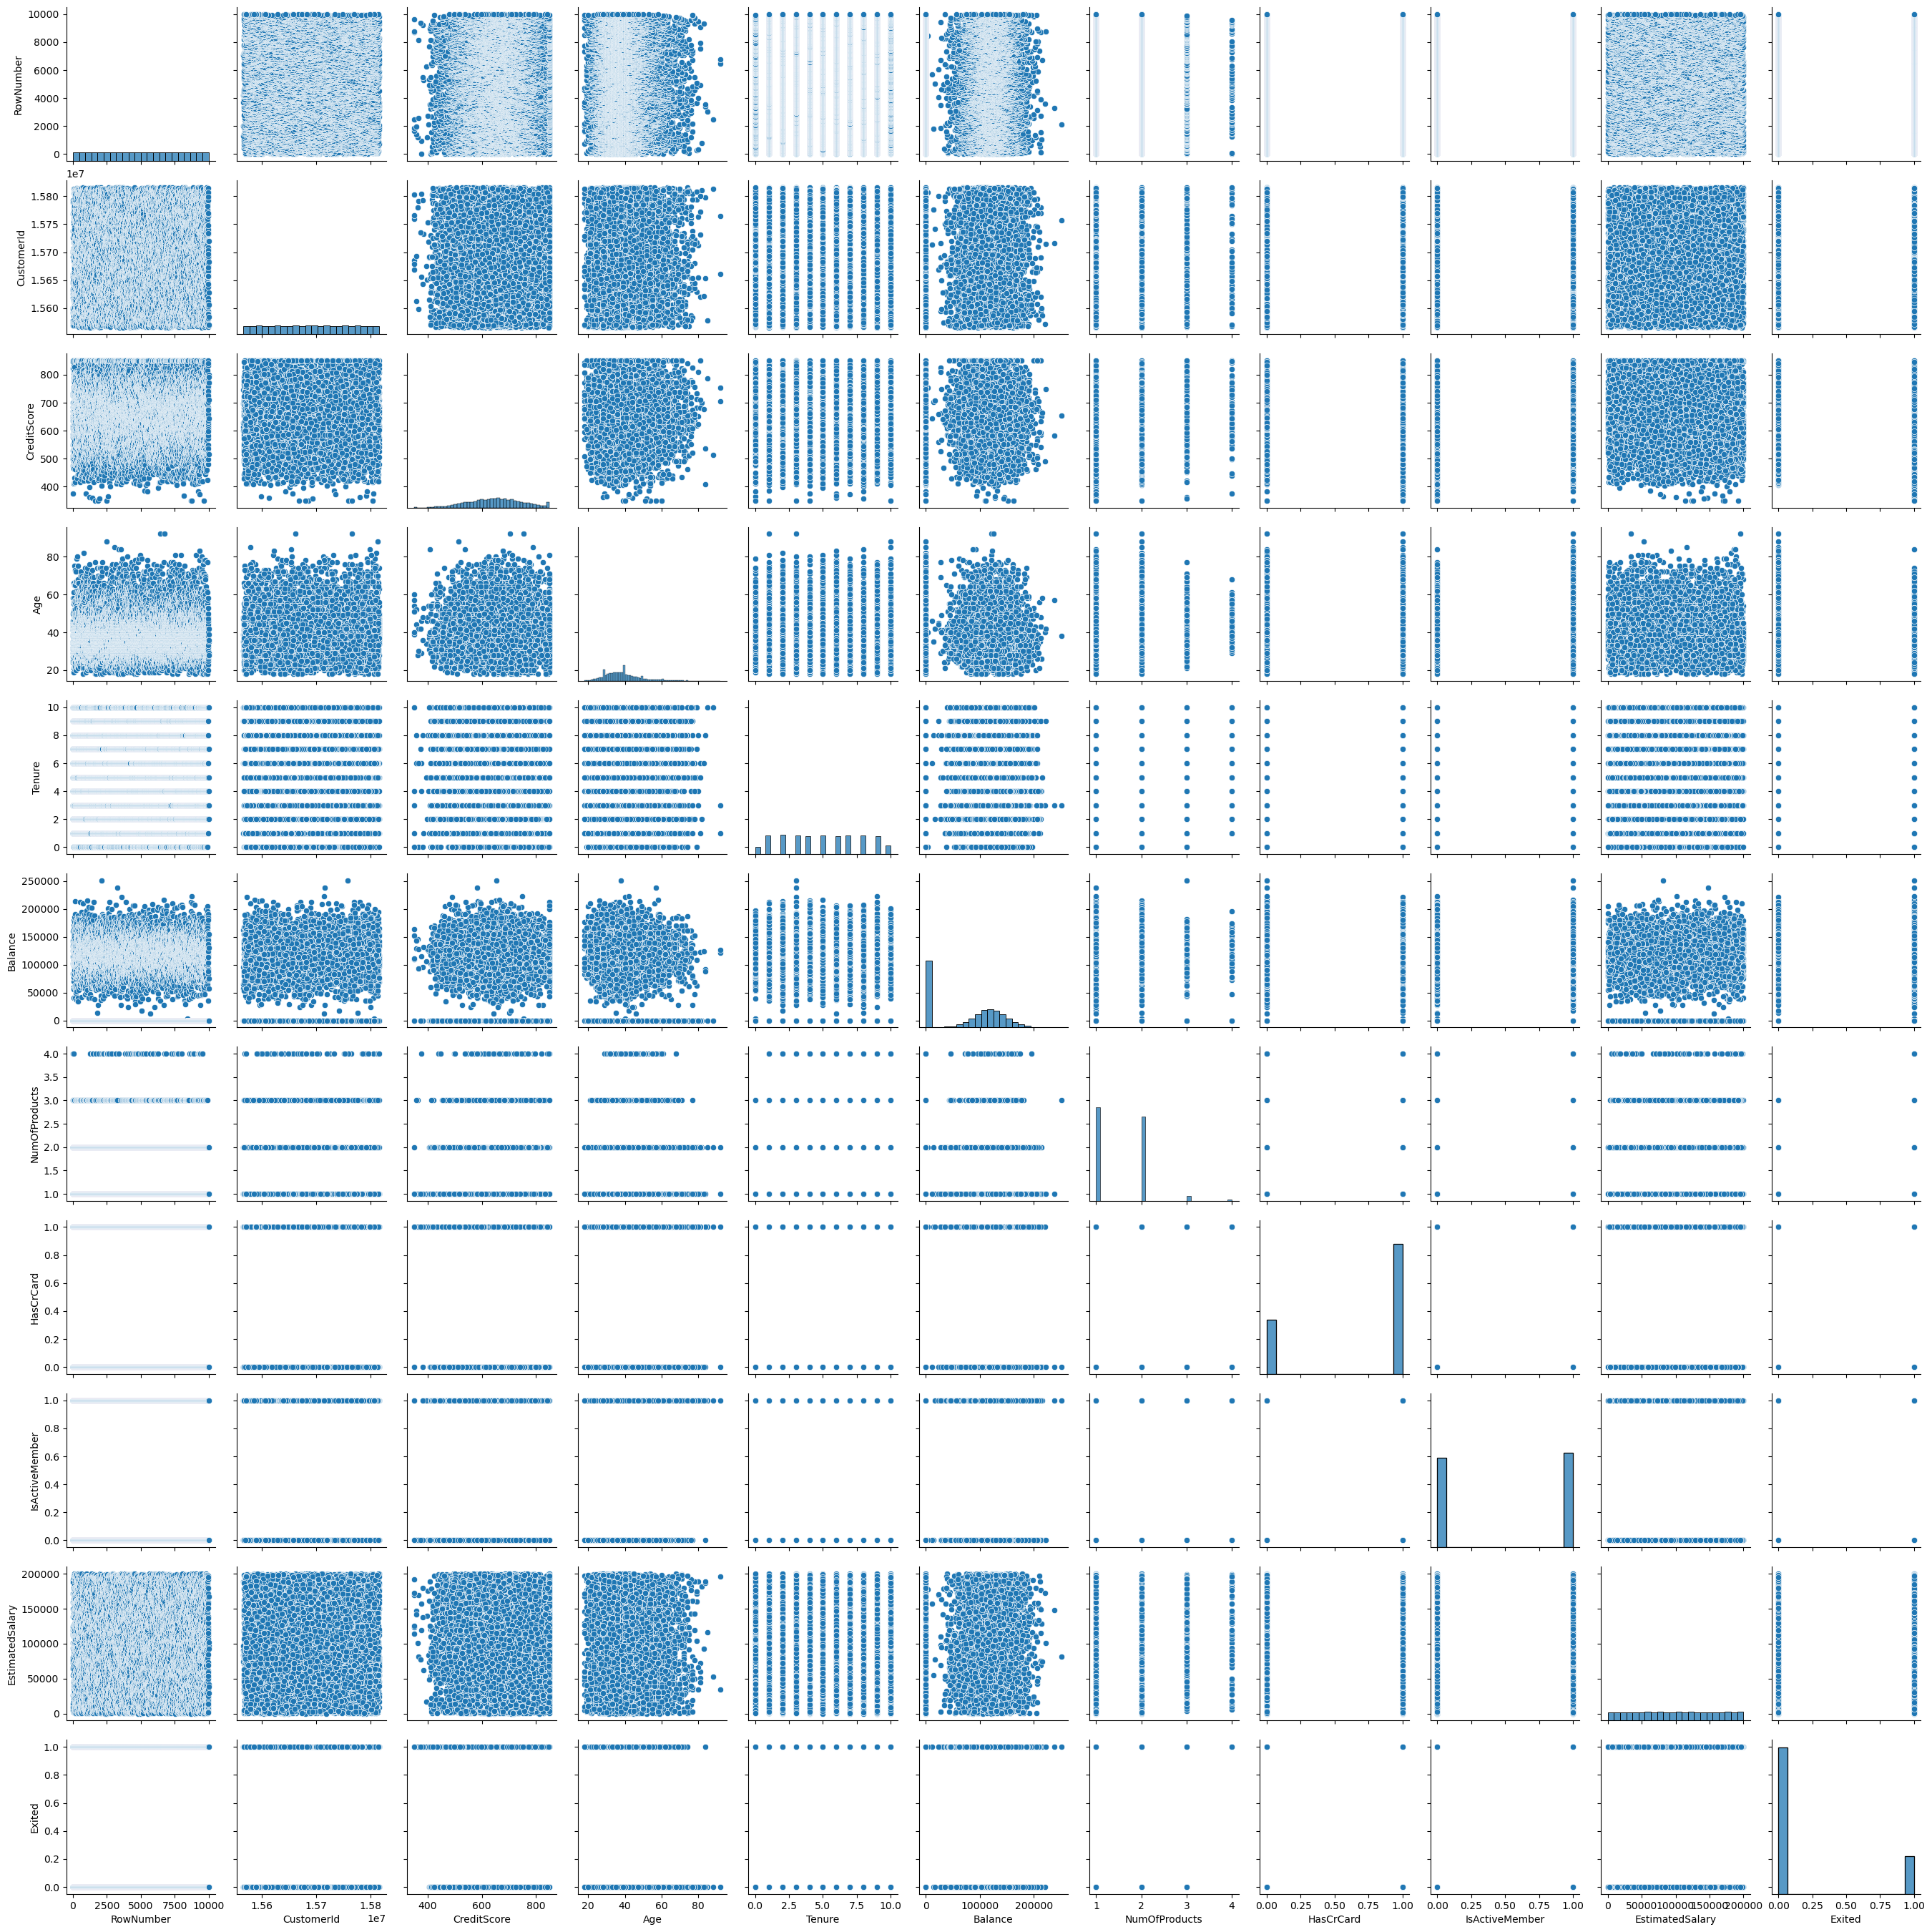

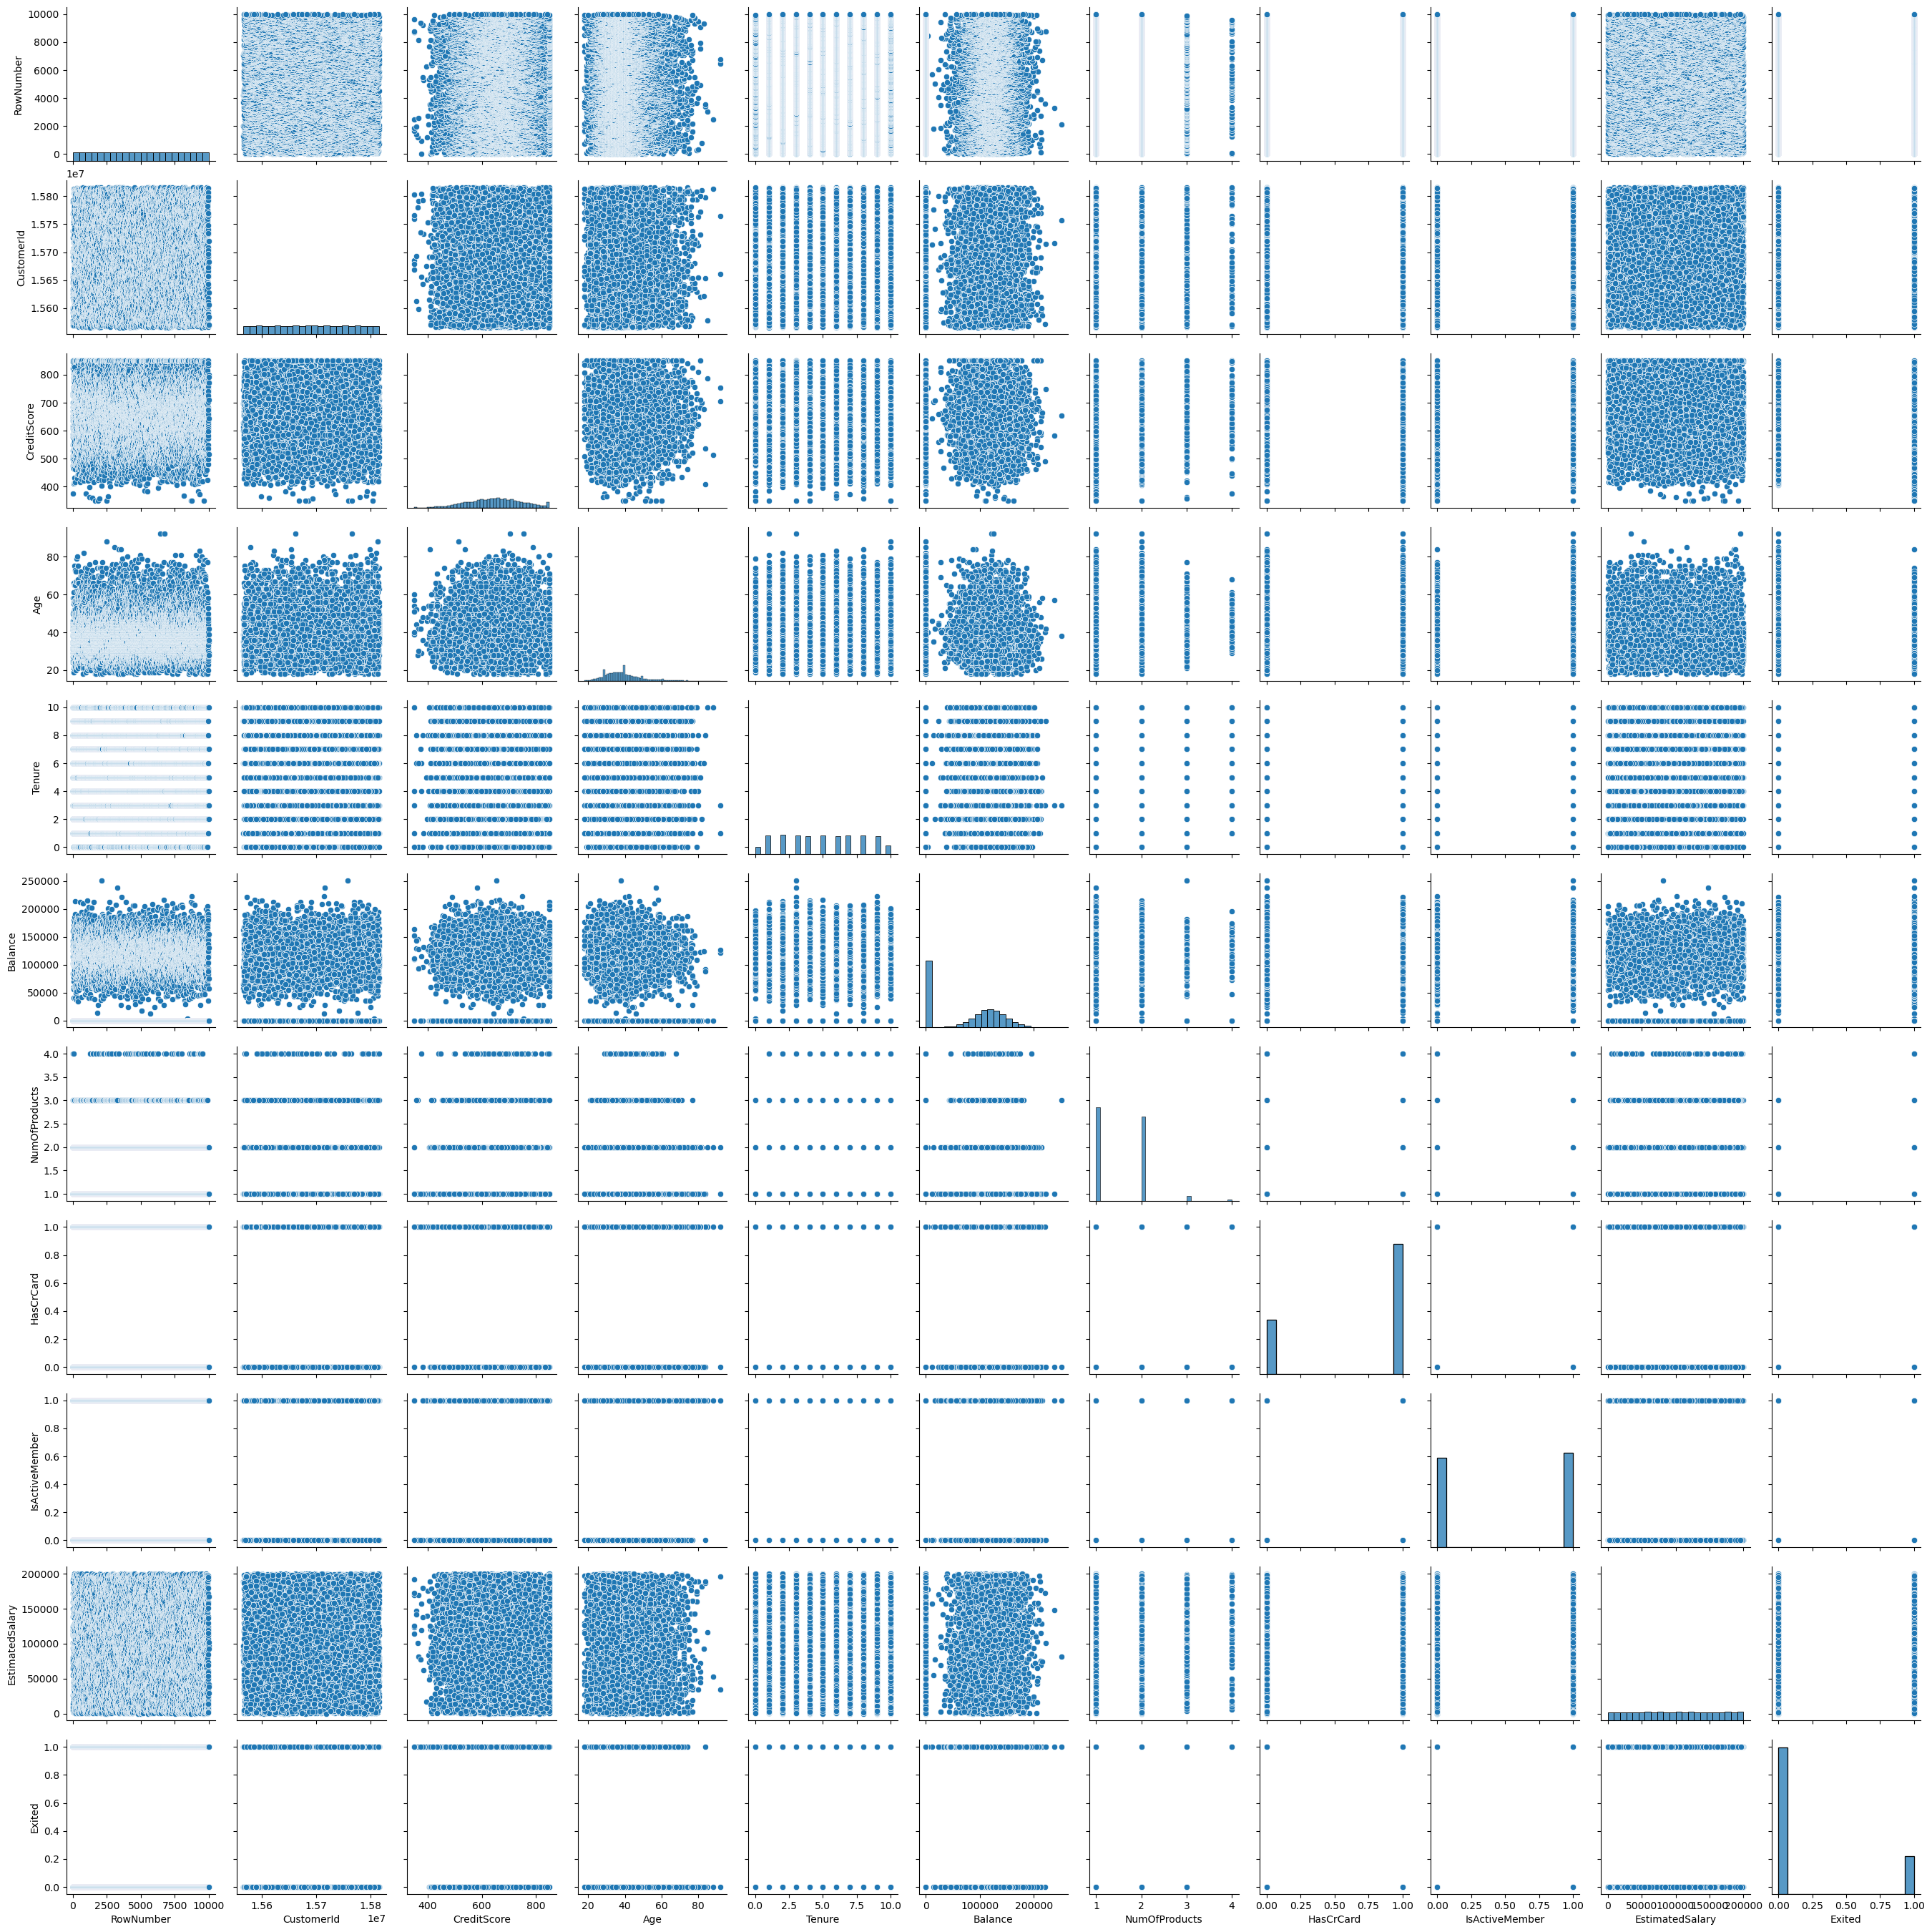

In [12]:
sns.pairplot(df)
plt.show()

# Perform descriptive statistics on the dataset

In [13]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

# Handle the missing values

In [14]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#no null values and missing values are variables

# Find the outliers and replace the outliers

In [15]:
df["Tenure"] = np.where(df["Tenure"]>10, np.median, df["Tenure"])
df["Age"] = np.where(df["Age"]>87, np.median, df["Age"])
df["EstimatedSalary"] = np.where(df["EstimatedSalary"]>45, np.median, df["EstimatedSalary"])

# Check for Categorical columns and perform encoding.

In [16]:
pd.get_dummies(df, columns = ["Gender", "Age"]).head()

RowNumber  CustomerId   Surname  CreditScore Geography Tenure    Balance  \
0          1    15634602  Hargrave          619    France      2       0.00   
1          2    15647311      Hill          608     Spain      1   83807.86   
2          3    15619304      Onio          502    France      8  159660.80   
3          4    15701354      Boni          699    France      1       0.00   
4          5    15737888  Mitchell          850     Spain      2  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  ... Age_74  Age_71  Age_76  \
0              1          1               1  ...      0       0       0   
1              1          0               1  ...      0       0       0   
2              3          1               0  ...      0       0       0   
3              2          0               0  ...      0       0       0   
4              1          1               1  ...      0       0       0   

   Age_77  Age_<function median at 0x0000021E183E4DC0>  Age_85  Age_84  \
0       0                                            0       0       0   
1       0                                            0       0       0   
2       0                                            0       0       0   
3       0                                            0       0       0   
4       0                                            0       0       0   

   Age_78  Age_81  Age_83  
0       0       0       0  
1       0       0       0  
2       0       0       0  
3       0       0       0  
4       0       0       0  

[5 rows x 83 columns]

# Split the data into dependent and independent variables.

In [17]:
x = df.iloc[:, :-1]
x.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender Age Tenure  \
0          1    15634602  Hargrave          619    France  Female  42      2   
1          2    15647311      Hill          608     Spain  Female  41      1   
2          3    15619304      Onio          502    France  Female  42      8   
3          4    15701354      Boni          699    France  Female  39      1   
4          5    15737888  Mitchell          850     Spain  Female  43      2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       0.00              1          1               1   
1   83807.86              1          0               1   
2  159660.80              3          1               0   
3       0.00              2          0               0   
4  125510.82              1          1               1   

                           EstimatedSalary  
0  <function median at 0x0000021E183E4DC0>  
1  <function median at 0x0000021E183E4DC0>  
2  <function median at 0x0000021E183E4DC0>  
3  <function median at 0x0000021E183E4DC0>  
4  <function median at 0x0000021E183E4DC0>

In [18]:
y = df.iloc[:, -1]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

# Scale the independent variables

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[["RowNumber"]] = scaler.fit_transform(df[["RowNumber"]])

In [20]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender Age Tenure  \
0     0.0000    15634602  Hargrave          619    France  Female  42      2   
1     0.0001    15647311      Hill          608     Spain  Female  41      1   
2     0.0002    15619304      Onio          502    France  Female  42      8   
3     0.0003    15701354      Boni          699    France  Female  39      1   
4     0.0004    15737888  Mitchell          850     Spain  Female  43      2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       0.00              1          1               1   
1   83807.86              1          0               1   
2  159660.80              3          1               0   
3       0.00              2          0               0   
4  125510.82              1          1               1   

                           EstimatedSalary  Exited  
0  <function median at 0x0000021E183E4DC0>       1  
1  <function median at 0x0000021E183E4DC0>       0  
2  <function median at 0x0000021E183E4DC0>       1  
3  <function median at 0x0000021E183E4DC0>       0  
4  <function median at 0x0000021E183E4DC0>       0

# Split the data into training and testing

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
print("Training shape of x :",x_train.shape)
print("Training shape of y :",y_train.shape)
print("Testing shape of x :",x_test.shape)
print("Testing shape of y :",y_test.shape)

Training shape of x : (8000, 13)
Training shape of y : (8000,)
Testing shape of x : (2000, 13)
Testing shape of y : (2000,)


In [24]:
x_train.head()

RowNumber  CustomerId  Surname  CreditScore Geography  Gender Age  \
7389       7390    15676909   Mishin          667     Spain  Female  34   
9275       9276    15749265  Carslaw          427   Germany    Male  42   
2995       2996    15582492    Moore          535    France  Female  29   
5316       5317    15780386    Ferri          654     Spain    Male  40   
356         357    15611759  Simmons          850     Spain  Female  57   

     Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
7389      5       0.00              2          1               0   
9275      1   75681.52              1          1               1   
2995      2  112367.34              1          1               0   
5316      5  105683.63              1          1               0   
356       8  126776.30              2          1               1   

                              EstimatedSalary  
7389  <function median at 0x0000021E183E4DC0>  
9275  <function median at 0x0000021E183E4DC0>  
2995  <function median at 0x0000021E183E4DC0>  
5316  <function median at 0x0000021E183E4DC0>  
356   <function median at 0x0000021E183E4DC0>

In [25]:
x_test.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender Age  \
9394       9395    15615753  Upchurch          597   Germany  Female  35   
898         899    15654700   Fallaci          523    France  Female  40   
2398       2399    15633877  Morrison          706     Spain  Female  42   
5906       5907    15745623   Worsnop          788    France    Male  32   
2343       2344    15765902    Gibson          706   Germany    Male  38   

     Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9394      8  131101.04              1          1               1   
898       2  102967.41              1          1               0   
2398      8   95386.82              1          1               1   
5906      4  112079.58              1          0               0   
2343      5  163034.82              2          1               1   

                              EstimatedSalary  
9394  <function median at 0x0000021E183E4DC0>  
898   <function median at 0x0000021E183E4DC0>  
2398  <function median at 0x0000021E183E4DC0>  
5906  <function median at 0x0000021E183E4DC0>  
2343  <function median at 0x0000021E183E4DC0>

In [26]:
y_train.head()

7389    0
9275    0
2995    0
5316    0
356     0
Name: Exited, dtype: int64

In [27]:
y_test.head()

9394    0
898     1
2398    0
5906    0
2343    0
Name: Exited, dtype: int64